In [1]:
from datetime import timedelta
import matplotlib.pyplot as plt

from pyfleascope.flea_scope import FleaScope, Waveform
from pyfleascope.trigger_config import AnalogTrigger, DigitalTrigger, BitState

In [ ]:
scope = FleaScope.connect('scope1', baud=115200)

In [4]:
scope.set_waveform(Waveform.EKG, 1000)

<Axes: >

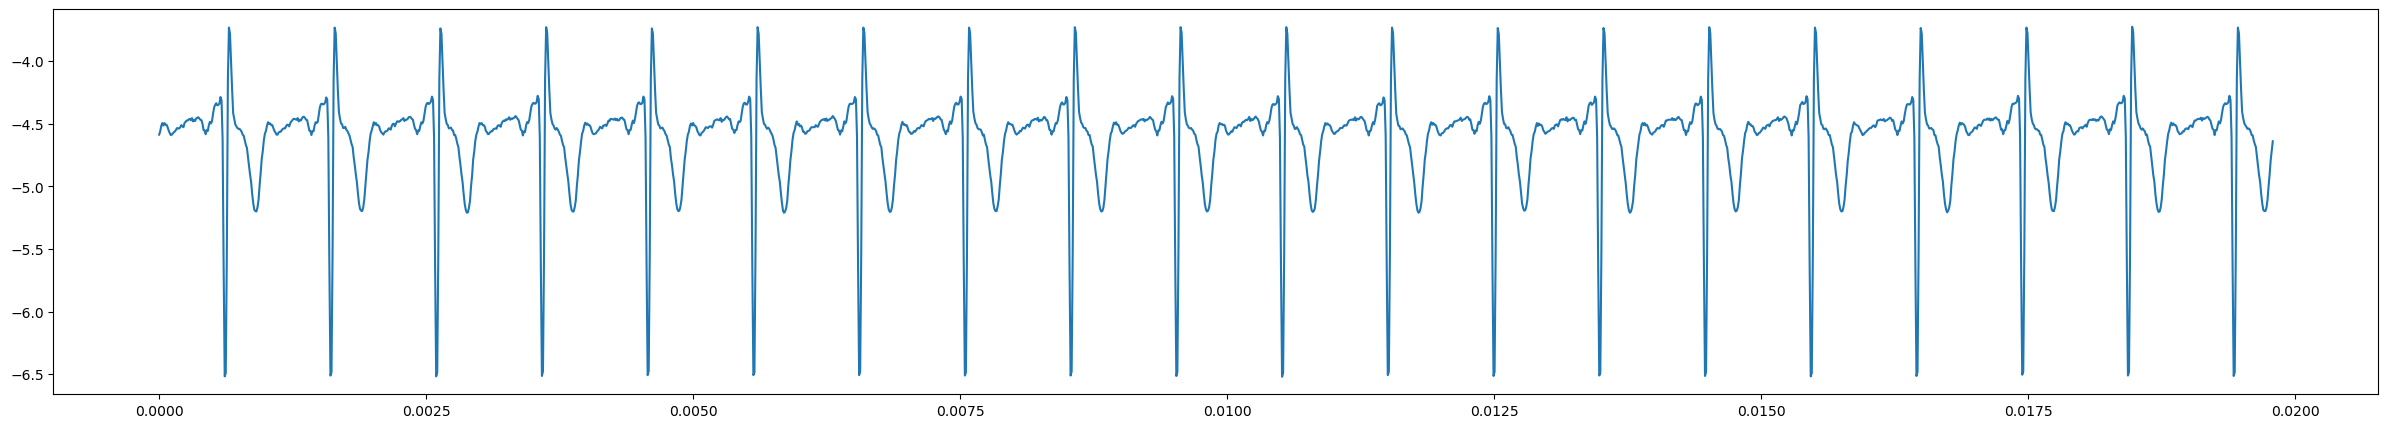

In [ ]:
df = scope.x1.read(
            timedelta(milliseconds=20),
            trigger=AnalogTrigger.start_capturing_when().auto(volts=2),
            delay=timedelta(milliseconds=9),
)

df['bnc'].plot(figsize=[30,5])

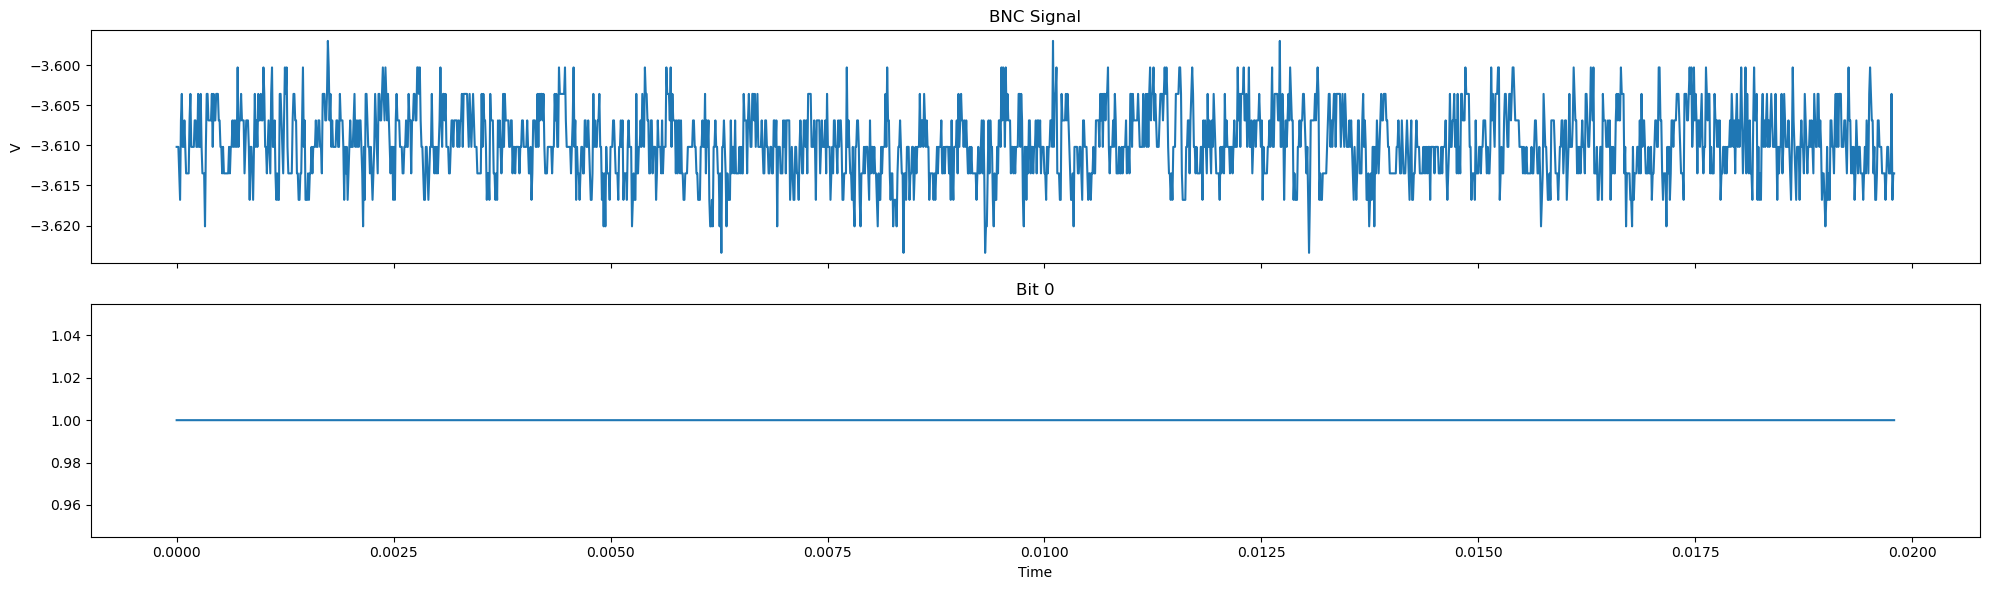

In [ ]:
df = scope.x1.read(
            timedelta(milliseconds=20),
            trigger=DigitalTrigger.start_capturing_when()
              .bit0(BitState.HIGH)
              .bit1(BitState.HIGH)
              .starts_matching(),
            delay=timedelta(milliseconds=9),
)
df = scope.extract_bits(df)
df['bit_0'] = df['bit_0'].apply(int)

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(20, 6))

df['bnc'].plot(ax=axes[0], title='BNC Signal')
axes[0].set_ylabel('V')

df['bit_0'].plot(ax=axes[1], title='Bit 0')
axes[1].set_xlabel('Time')

plt.tight_layout()
plt.show()